# CNN Model (in Colab)
- Read pickle files
- Build CNN model
- Optimize model
- Save model
- Plots

In [1]:
#!pip install tensorflow google-cloud-storage

In [2]:
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


In [3]:
# Read pickle file on google's My Drive/pickles
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Try listing the contents of the directory to check if the file exists
!ls "/content/drive/My Drive/pickles/"


melanoma.pkl  X_test.pkl  X_train.pkl  X_val.pkl  y_test.pkl  y_train.pkl  y_val.pkl


In [5]:
# Load the images from the pkl file
# X_train
with open('/content/drive/My Drive/pickles/X_train.pkl', 'rb') as file:
# with open('pickles/X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)
#X_val
with open('/content/drive/My Drive/pickles/X_val.pkl', 'rb') as file:
# with open('pickles/X_val.pkl', 'rb') as file:
    X_val = pickle.load(file)
#X_test
with open('/content/drive/My Drive/pickles/X_test.pkl', 'rb') as file:
# with open('pickles/X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)

In [6]:
# Open Label Files
# y_train
with open('/content/drive/My Drive/pickles/y_train.pkl', 'rb') as file:
#with open('pickles/y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)
# y_val
with open('/content/drive/My Drive/pickles/y_val.pkl', 'rb') as file:
#with open('pickles/y_val.pkl', 'rb') as file:
    y_val = pickle.load(file)
# y_test
with open('/content/drive/My Drive/pickles/y_test.pkl', 'rb') as file:
#with open('pickles/y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [7]:
print("X_train shape:", X_train.shape)
print("X_val shape  :", X_val.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape  :", y_val.shape)
print("y_test shape :", y_test.shape)

X_train shape: (6682, 300, 300, 3)
X_val shape  : (1671, 300, 300, 3)
X_test shape : (2652, 300, 300, 3)
y_train shape: (6682,)
y_val shape  : (1671,)
y_test shape : (2652,)


In [8]:
X_test.size

716040000

In [9]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [10]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6682, 2)
(1671, 2)
(2652, 2)


## Build CNN Model

In [10]:
# Build CNN model
def cnn_model():
  model= tf.keras.models.Sequential()
  model.add(layers.Input((300, 300, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  # model.add(Dropout(0.25))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  return model

In [11]:
# Instantiate model
model = cnn_model()

In [ ]:
# Define a CNN model
# model = keras.Sequential([
#    layers.Input((300, 300, 3)),
#    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Flatten(),
#    layers.Dense(128, activation='relu'),
#    layers.Dense(2, activation='sigmoid')
#])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 300, 300, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 150, 150, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,440,130 (20.75 MB)

 Trainable params: 5,439,554 (20.75 MB)

 Non-trainable params: 576 (2.25 KB)

In [13]:
# Compile the model using Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Create call back functions

# Import the callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the callbacks

# ModelCheckpoint callback (saves best model at specified interval)
checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only=True,        monitor="val_loss", mode="min")
# EarlyStopping callback (halts training when metric has stopped improvement, to prevent overfitting)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss", mode="min")
# ReduceLROnPlateau callback (reduces the learning rate when a monitored metric has stopped improving)
reduce_lr_cb = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, monitor="val_loss", mode="min")


In [15]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import datetime

In [16]:
# Clear any logs from previous runs
log_dir = "/content/drive/My Drive/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


In [17]:
# Adding tf.keras.callbacks.TensorBoard callback ensures that logs are created and stored

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [18]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb, tensorboard_callback]
                    )


Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.8482 - loss: 0.5095 - val_accuracy: 0.4722 - val_loss: 1.3971 - learning_rate: 1.0000e-04
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9151 - loss: 0.2159 - val_accuracy: 0.7373 - val_loss: 0.7132 - learning_rate: 1.0000e-04
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9311 - loss: 0.1811 - val_accuracy: 0.8737 - val_loss: 0.3035 - learning_rate: 1.0000e-04
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9475 - loss: 0.1443 - val_accuracy: 0.8773 - val_loss: 0.2944 - learning_rate: 1.0000e-04
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9530 - loss: 0.1123 - val_accuracy: 0.9126 - val_loss: 0.2370 - learning_rate: 1.0000e-04
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9630 - loss: 0.0981 - val_accuracy: 0.9072 - val_loss: 0.2682 - learning_rate: 1.0000e-04
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - ac

### Note: Originally model did not have "BatchNormalization" and it took 30 epochs to achieve an accuracy of 0.92. Above updated model that has "BatchNormalization" took only 10 epochs.


In [ ]:
# sess.graph contains the graph definition; that enables the Graph Visualizer.

# file_writer = tf.summary.FileWriter('logs/fit/', sess.graph)

In [ ]:
# # Train the model
# history = model.fit(X_train, y_train,
#                     epochs=50, batch_size=32,
#                     validation_data=(X_val, y_val),
#                     callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb]
#                     )

## >>>>>>>>>> Previous model took 30 epochs <<<<<<<<<<

Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7083 - loss: 0.5222 - val_accuracy: 0.8288 - val_loss: 0.4014 - learning_rate: 1.0000e-04
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8588 - loss: 0.3243 - val_accuracy: 0.8689 - val_loss: 0.3085 - learning_rate: 1.0000e-04
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8882 - loss: 0.2716 - val_accuracy: 0.8767 - val_loss: 0.2935 - learning_rate: 1.0000e-04
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.8926 - loss: 0.2578 - val_accuracy: 0.8809 - val_loss: 0.2963 - learning_rate: 1.0000e-04
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8991 - loss: 0.2520 - val_accuracy: 0.8959 - val_loss: 0.2655 - learning_rate: 1.0000e-04
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9061 - loss: 0.2283 - val_accuracy: 0.8977 - val_loss: 0.2502 - learning_rate: 1.0000e-04
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/ste

In [19]:
# Evaluate the model using the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9218 - loss: 0.2272
Test accuracy: 0.9151583909988403


In [20]:
# Predict using the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
print(y_pred_probs)

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
[[9.6840656e-01 3.1593438e-02]
 [1.7525295e-04 9.9982482e-01]
 [9.9423885e-01 5.7611335e-03]
 ...
 [9.9219972e-01 7.8002554e-03]
 [2.9022243e-07 9.9999976e-01]
 [9.2936289e-01 7.0637077e-02]]


In [21]:
# Check few predictions
print(y_pred[:50])
print(y_true[:50])

[0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1
 1 0 1 1 1 1 1 0 1 1 0 1 0]
[0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 0]


In [22]:
# plot images with True and predicted values from model
# Set up the subplot grid
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over the subplot grid
for i, ax in enumerate(axes.flat):
    if i < 50:
        # Read the image
        img = X_test[i]

        # Display the image
        # ax.imshow(img*255).astype('uint8')  # gives an error
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels
        if y_true[i] == y_pred[i]:
          ax.set_title(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}", color='green')
        else:
          # Prediction was wrong - diplay in red color
          ax.set_title(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}", color='red')
        #ax.set_title(f'Image {i+1}', fontsize=8)
    # else:
    #     # Remove the empty subplot
    #     ax.remove()

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [23]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')
roc_auc = roc_auc_score(y_true, y_pred_probs[:, 1])  # Use probabilities for AUC

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.90
Recall: 0.92
F1 Score: 0.91
AUC-ROC: 0.97


In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
#print(conf_matrix)
conf_matrix

Confusion Matrix:


array([[1268,  127],
       [  98, 1159]])

In [25]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1395
           1       0.90      0.92      0.91      1257

    accuracy                           0.92      2652
   macro avg       0.91      0.92      0.92      2652
weighted avg       0.92      0.92      0.92      2652



# Save the Model

In [26]:
# Save the model
model.save('/content/drive/My Drive/saved_model/melanoma_cnn_model.keras')

In [42]:
# # Also save model on Google cloud storage
# from google.cloud import storage

# # Set up GCS client
# client = storage.Client()

# # Reference to the bucket
# bucket = client.bucket('gh_gcs_bucket')

# # Reference to the destination blob (file name in the bucket)
# blob = bucket.blob('models/melanoma_cnn_model.keras')

# # Upload the model file
# blob.upload_from_filename('/content/drive/My Drive/saved_model/melanoma_cnn_model.keras')

# Plots

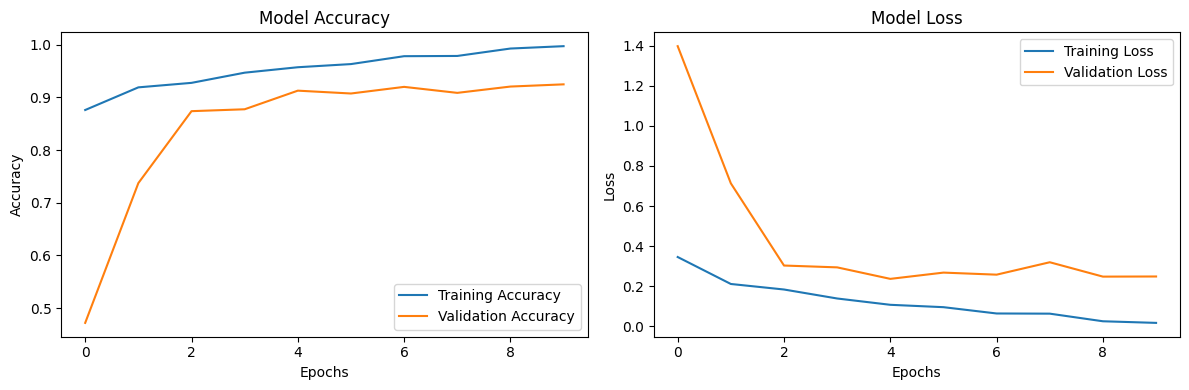

In [27]:
# Plot accuracy and loss curves
# Subplot Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Subplot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

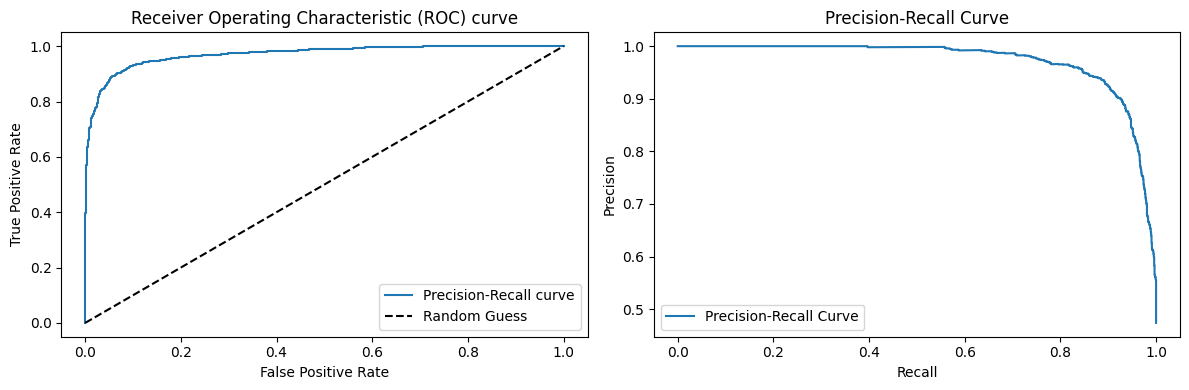

In [28]:
# Plot ROC & Precision-Recall curves
# ROC curve subplot
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs[:, 1])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label="Precision-Recall curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.legend(loc='lower right')

# Precision-Recall curve subplot
precision_vals, recall_vals, thresholds = precision_recall_curve(y_true,
                                                    y_pred_probs[:, 1])

plt.subplot(1, 2, 2)
plt.plot(recall_vals, precision_vals, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Fine tuning

In [29]:
model_sgd = cnn_model()

In [30]:
# Use SGD optimizer
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [31]:
history_sgd = model_sgd.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb]
                    )

Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.8268 - loss: 0.4224 - val_accuracy: 0.5637 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9061 - loss: 0.2192 - val_accuracy: 0.7510 - val_loss: 0.4785 - learning_rate: 0.0010
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9243 - loss: 0.1808 - val_accuracy: 0.9084 - val_loss: 0.2456 - learning_rate: 0.0010
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9410 - loss: 0.1575 - val_accuracy: 0.8755 - val_loss: 0.3010 - learning_rate: 0.0010
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9519 - loss: 0.1345 - val_accuracy: 0.9120 - val_loss: 0.2260 - learning_rate: 0.0010
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9520 - loss: 0.1228 - val_accuracy: 0.9186 - val_loss: 0.2169 - learning_rate: 0.0010
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9646 - loss: 0

In [32]:
# Evaluate the model using the testing data
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(X_test, y_test)
print('Test accuracy:', test_acc_sgd)

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9267 - loss: 0.1988
Test accuracy: 0.9272247552871704


In [33]:
# Predict using the model
y_pred_probs_sgd = model_sgd.predict(X_test)
y_pred_sgd = np.argmax(y_pred_probs_sgd, axis=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


In [34]:
# Confusion Matrix for SGD Model
conf_matrix_sgd = confusion_matrix(y_true, y_pred_sgd)
print("Confusion Matrix for SGD model:")
#print(conf_matrix)
conf_matrix_sgd

Confusion Matrix for SGD model:


array([[1306,   89],
       [ 104, 1153]])

In [35]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_sgd))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1395
           1       0.93      0.92      0.92      1257

    accuracy                           0.93      2652
   macro avg       0.93      0.93      0.93      2652
weighted avg       0.93      0.93      0.93      2652



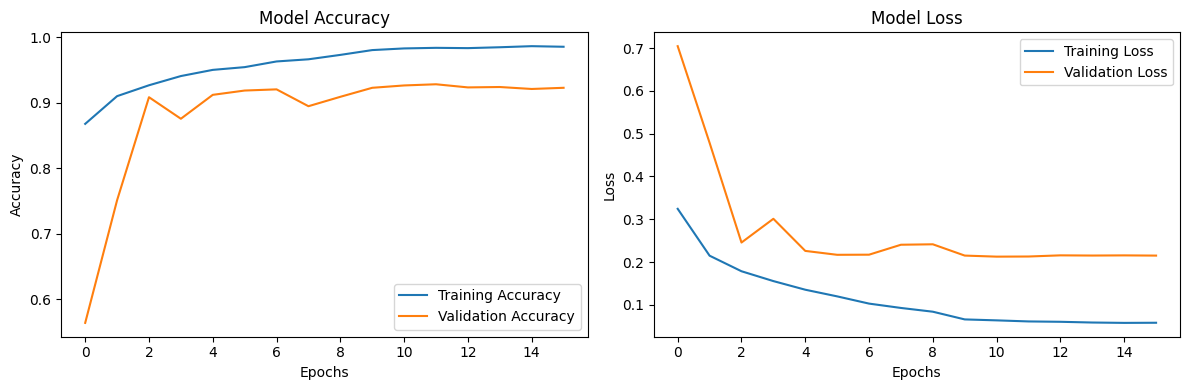

In [36]:
# for SGD Model Plot accuracy loss curves
# Plotting Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# # To load the model later to make predictions -
# from tensorflow.keras.models import load_model

# # Load the model
# model = load_model('saved_model/melanoma_cnn_model.h5')

# # Prediction for a new image data
# # Note - need to convert Image file to numpy file, convert image to floating point & normalize the file and create image_data
# prediction = model.predict(image_data)

# # Interpret the prediction
# if prediction[0] > 0.5:
#     print("Prediction is malignant.")
# else:
#     print("Prediction is benign.")